# Limpieza

In [1]:
# Importanción librerias
import sys
import os
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import missingno as msno
import re 
import warnings
import json
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [2]:
# read
tags=pd.read_excel("../../data/meta data/tags relevantes.xlsx")
tags_cc=tags.tag.to_list()
dic={}
for i,j in zip(tags.tag,tags.description):
    dic[i]=j
tags

,tag,description,upper bound,lower bound,unit
0,CF:CVB007_S2.PNT.FOX,granulometry,NaN,NaN,NaN
1,CF:225.WIC8067.MEAS.FOX,charge cell,NaN,NaN,NaN
2,disp_ley_pirita,pyrite law,NaN,NaN,NaN
3,disp_ley_calcopirita,chalcopyrite law,NaN,NaN,NaN
4,disp_ley_calcosina,chalcocite law,NaN,NaN,NaN
5,disp_crusher_index,crusher index,NaN,NaN,NaN
6,disp_sag_power_index,sag power index,NaN,NaN,NaN
7,disp_ball_work_index,ball work index,NaN,NaN,NaN
8,CF:215.WIC1605A.MEAS.FOX,TPH,NaN,NaN,NaN
9,CF:EXPERTO:EXP_MS_A.MEAS_5.FOX,HH TPH,NaN,NaN,NaN


In [3]:
# Se lee csv
consolidation=pd.read_csv('../../data/consolidated data/consolidation_15December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')
consolidation.sort_index(inplace=True)
#consolidation.rename(columns=dic,inplace=True)
consolidation.head()

,CF:EXPERTO.HAB_EXP.CO_1.FOX,Limitado por Límite Alto de Tonelaje,Optimizando tonelaje,Limitado por Peso,Limitado por Corriente Bobina,Limitado por torque espesador 2,Limitado por torque espesador 3,Limitado por Potencia Bolas 1,Limitado por Potencia Bolas 2,Limitado por Pebbles,Limitado por Corriente harnero,Limitado por Potencia SAG,Limitado por limite bajo de tonelaje,Limitado por Temperatura bobina,Limitado por presión espesador 2,Limitado por presión espesador 3,disp_ley_pirita,disp_ley_calcopirita,disp_ley_calcosina,disp_ley_covelina,disp_crusher_index,disp_sag_power_index,disp_ball_work_index,disp_ley_bornita,CF:225.OI8162.PNT.FOX,CF:225.WIC8067.MEAS.FOX,CF:225.JI8161.PNT.FOX,CF:215.WIC1605A.MEAS.FOX,CF:215.PORC_SOLD.PNT.FOX,CF:225.FIC1701.MEAS.FOX,CF:225.SI8160.PNT.FOX,CF:225:FIC1701CA_RI02.FOX,CF:EXPERTO:EXP_MS_A.MEAS_1.FOX,CF:EXPERTO:EXP_MS_A.MEAS_7.FOX,CF:EXPERTO:EXP_MS_A.MEAS_5.FOX,CF:225.II8163.PNT.FOX,CF:CVB007_S2.PNT.FOX
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.499208,864.295848,23071.203516,3847.009774,65.090716,2063.724810,9.063008,65.0,820.0,900.0,4350.0,3935.520368,63.702719
2018-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.410009,862.125504,23043.030173,3872.996001,65.171210,2072.257994,9.062102,65.0,820.0,900.0,4350.0,3930.839200,62.920996
2018-01-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.261466,859.956386,22991.287211,3879.211149,65.122192,2079.820066,9.062520,65.0,820.0,900.0,4350.0,3923.503230,62.847943
2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.115891,858.914758,22943.243462,3894.792946,65.085609,2089.536865,9.062208,65.0,820.0,900.0,4350.0,3914.689267,63.369101
2018-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.054172,857.932221,22921.665087,3959.416847,65.271563,2110.715057,9.062822,65.0,820.0,900.0,4350.0,3910.292390,63.409187


In [4]:
consolidation.shape

(2475480, 37)

<AxesSubplot:>

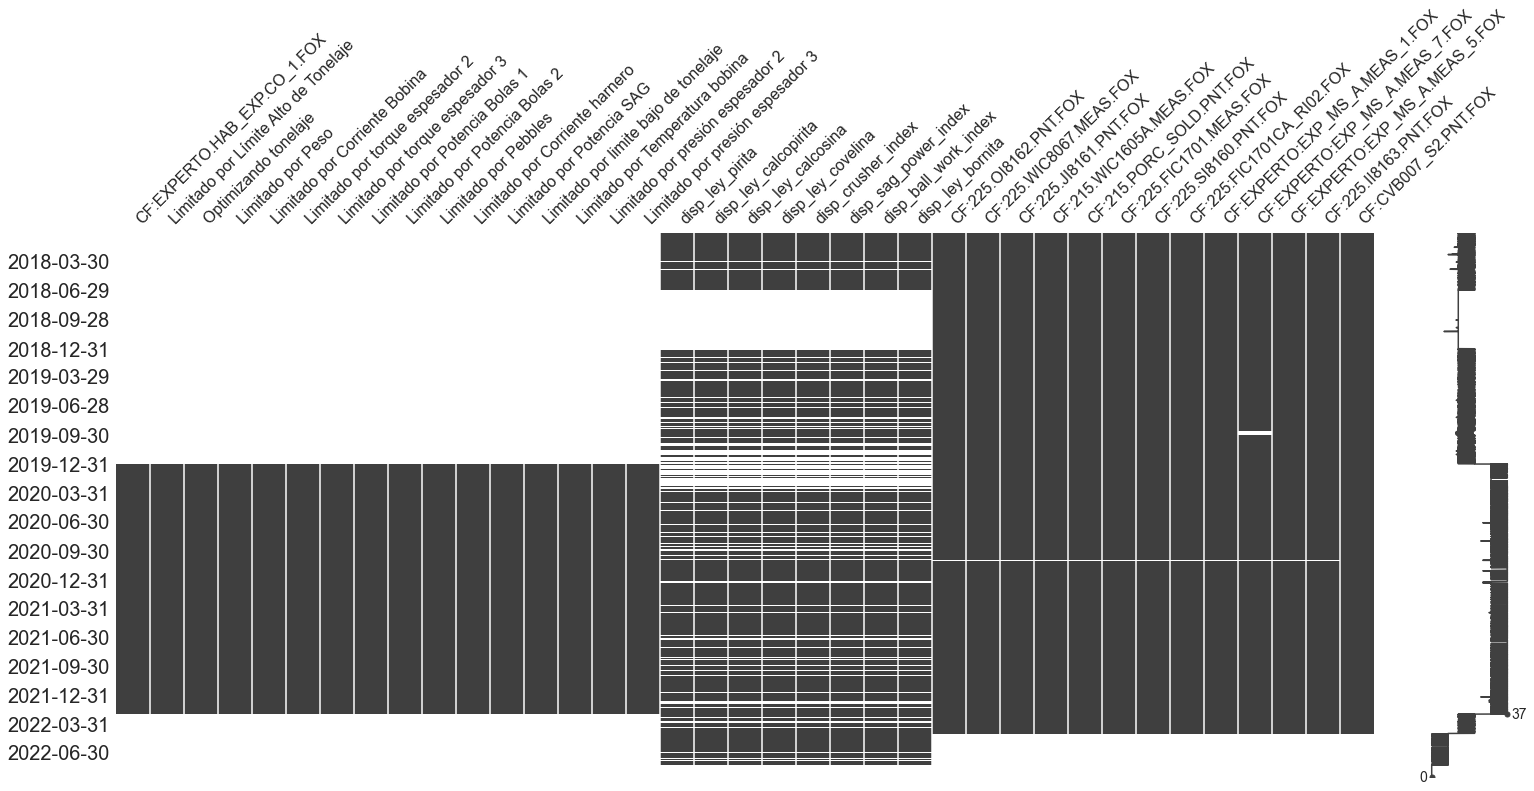

In [5]:
# Missings
msno.matrix(consolidation,freq='BQ')

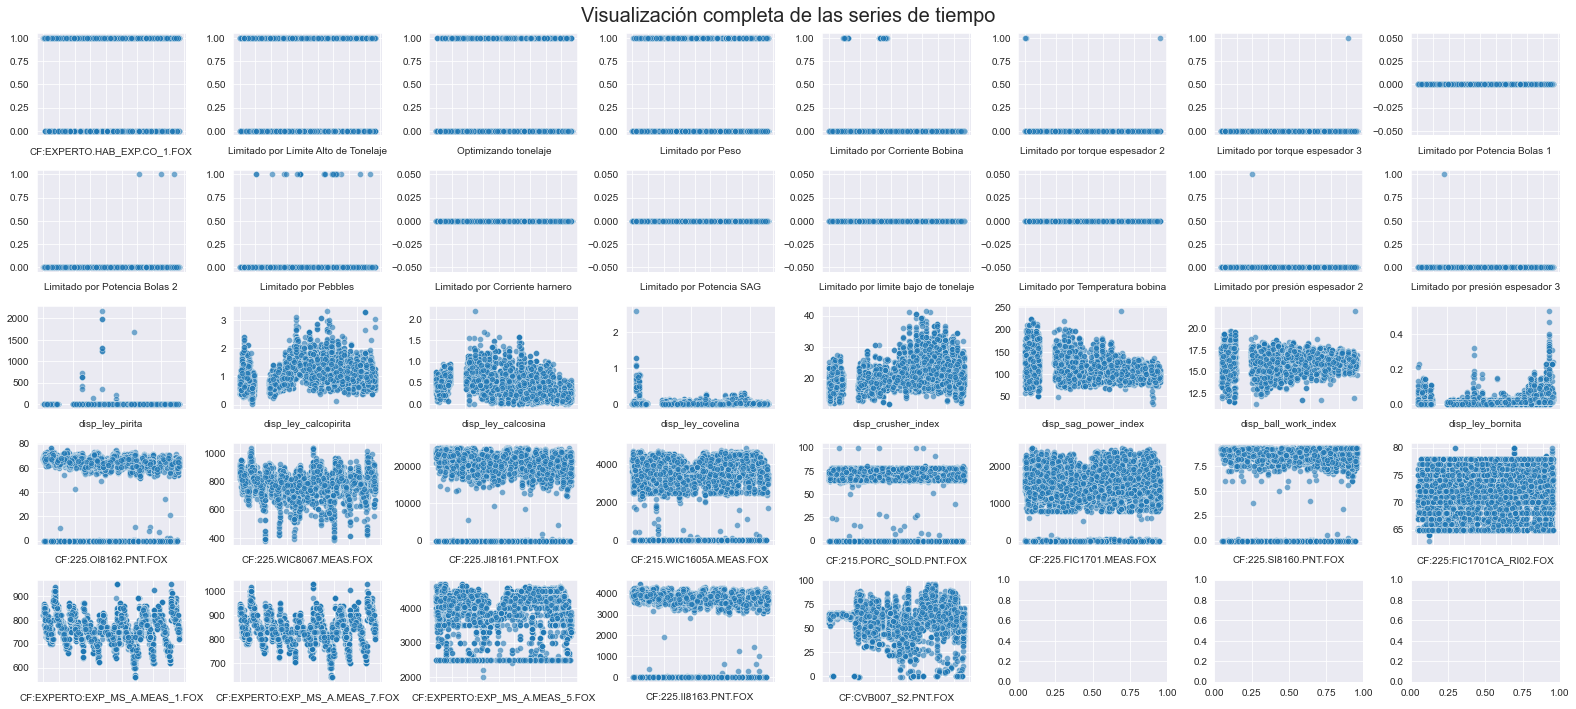

In [6]:
# Visualización completa de las series temporales

sample=consolidation.copy().sample(10000)
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.scatterplot(data=sample, x=sample.index, y=sample.columns[k], alpha=0.6, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(sample.columns[k], fontsize = 10.0)
            ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
fig.suptitle('Visualización completa de las series de tiempo',size=20)
fig.tight_layout()

In [7]:
# HH fill with LL
consolidation["CF:EXPERTO:EXP_MS_A.MEAS_7.FOX"][consolidation["CF:EXPERTO:EXP_MS_A.MEAS_7.FOX"].isnull()]=consolidation["CF:EXPERTO:EXP_MS_A.MEAS_1.FOX"][consolidation["CF:EXPERTO:EXP_MS_A.MEAS_7.FOX"].isnull()]+80
# LL fill with HH
consolidation["CF:EXPERTO:EXP_MS_A.MEAS_1.FOX"][consolidation["CF:EXPERTO:EXP_MS_A.MEAS_1.FOX"].isnull()]=consolidation["CF:EXPERTO:EXP_MS_A.MEAS_7.FOX"][consolidation["CF:EXPERTO:EXP_MS_A.MEAS_1.FOX"].isnull()]-80

In [8]:
# Limpieza data dispatch
consolidation['disp_ley_pirita'][~(consolidation['disp_ley_pirita'] <= 6)]=np.nan
consolidation['disp_ley_calcopirita'][~(consolidation['disp_ley_calcopirita'] <= 10)]=np.nan
consolidation['disp_ball_work_index'][~(consolidation['disp_ball_work_index'] >= 10)]=np.nan
consolidation['disp_crusher_index'][~(consolidation['disp_crusher_index']>=10)]=np.nan
consolidation['CF:215.PORC_SOLD.PNT.FOX'][~(consolidation['CF:215.PORC_SOLD.PNT.FOX'].between(62, 82))]=np.nan

# Considerar solo cuando HH TpH está alto
consolidation['CF:EXPERTO:EXP_MS_A.MEAS_5.FOX'][~(consolidation['CF:EXPERTO:EXP_MS_A.MEAS_5.FOX'] >= 3000)]=np.nan

# Correccion y limpieza Tph
consolidation['CF:215.WIC1605A.MEAS.FOX'][~(consolidation['CF:215.WIC1605A.MEAS.FOX'] >= 2000)]=np.nan
consolidation['CF:215.WIC1605A.MEAS.FOX'][~(consolidation['CF:215.WIC1605A.MEAS.FOX'] <= 4800)]=np.nan

# Limpieza CC
consolidation['CF:225.WIC8067.MEAS.FOX'][~(consolidation['CF:225.WIC8067.MEAS.FOX'] <= 1000)]=np.nan

# Limpieza granulometria
consolidation['CF:CVB007_S2.PNT.FOX'][~(consolidation['CF:CVB007_S2.PNT.FOX'] >= 20)]=np.nan


consolidation['CF:CVB007_S2.PNT.FOX'] = consolidation['CF:CVB007_S2.PNT.FOX'].rolling(7, center=True).apply(np.nanmean)


consolidation['CF:CVB007_S2.PNT.FOX'][(consolidation['CF:CVB007_S2.PNT.FOX'].diff()== 0)]=np.nan

In [9]:
tags=['disp_ley_pirita',
       'disp_ley_calcopirita', 'disp_ley_calcosina', 'disp_ley_covelina',
       'disp_crusher_index', 'disp_sag_power_index', 'disp_ball_work_index',
       'disp_ley_bornita', 'CF:225.OI8162.PNT.FOX', 'CF:225.WIC8067.MEAS.FOX',
       'CF:225.JI8161.PNT.FOX', 'CF:215.WIC1605A.MEAS.FOX',
       'CF:215.PORC_SOLD.PNT.FOX', 'CF:225.FIC1701.MEAS.FOX',
       'CF:225.SI8160.PNT.FOX', 'CF:225:FIC1701CA_RI02.FOX',
       'CF:EXPERTO:EXP_MS_A.MEAS_1.FOX', 'CF:EXPERTO:EXP_MS_A.MEAS_7.FOX',
       'CF:EXPERTO:EXP_MS_A.MEAS_5.FOX', 'CF:225.II8163.PNT.FOX',
       'CF:CVB007_S2.PNT.FOX']

In [10]:
# Valores mayores que cero
for i in tags:
    consolidation[i][~(consolidation[i]>=0)]=np.nan 

<AxesSubplot:>

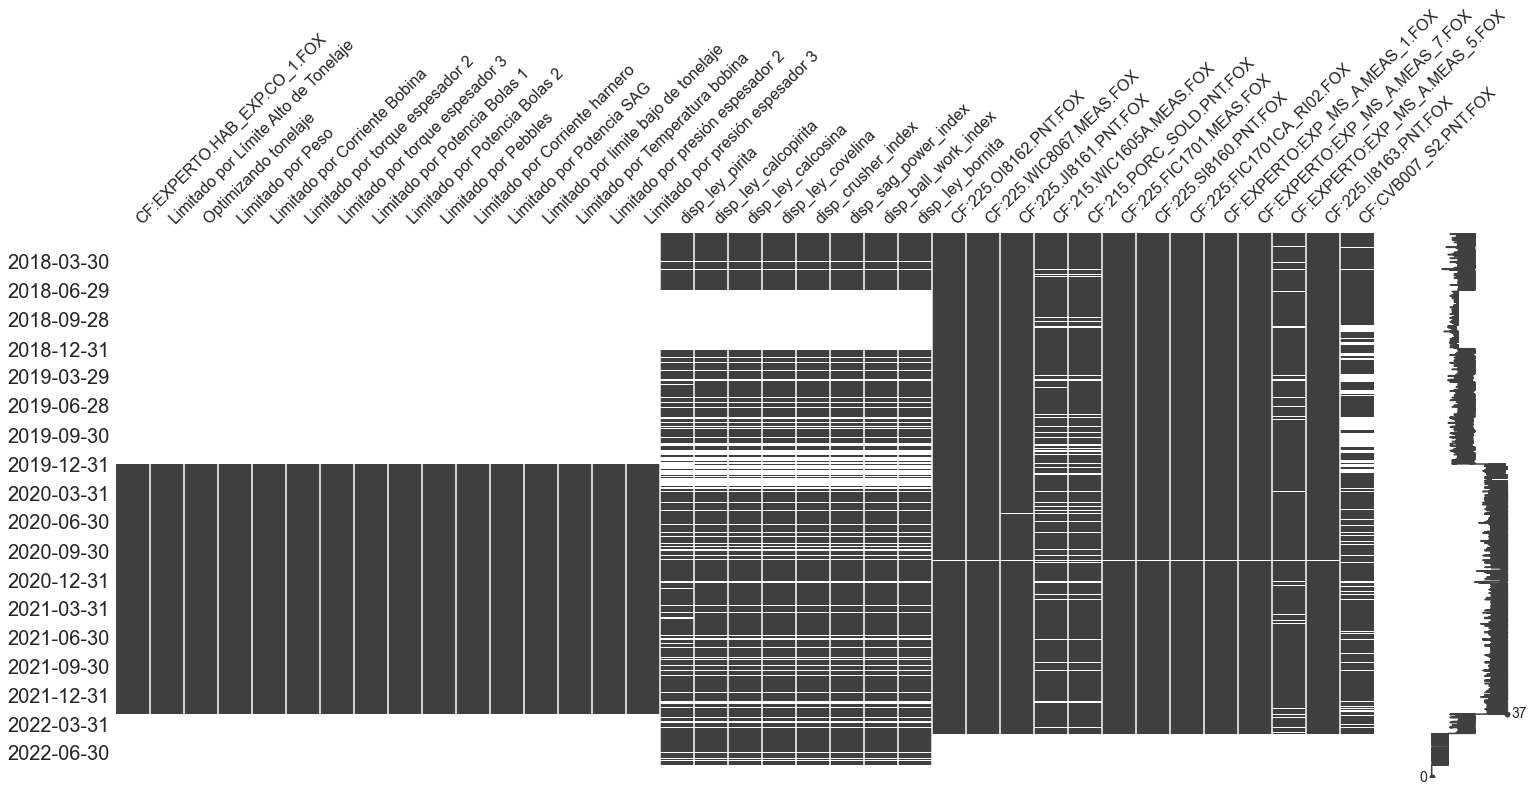

In [11]:
# Missings
msno.matrix(consolidation,freq='BQ')

In [12]:
# Función de clean
def clean(df):
    feat_trim = {}
    X=df.copy()
    for i in X.columns:
        # Outlier removal by frequency
        mu = X[i].mean()
        sigma = X[i].std()
        X[i] = X[i].apply(lambda x: np.nan if x>mu+3*sigma else np.nan if x<mu-3*sigma else x)
        feat_trim['mu_'+i] = mu
        feat_trim['sigma_'+i] = sigma
    return X

In [13]:
# Clean
consolidation[tags]=clean(consolidation[tags])

In [14]:
# Interpolate Nans in features
consolidation[tags] = consolidation[tags].interpolate(limit = 120)

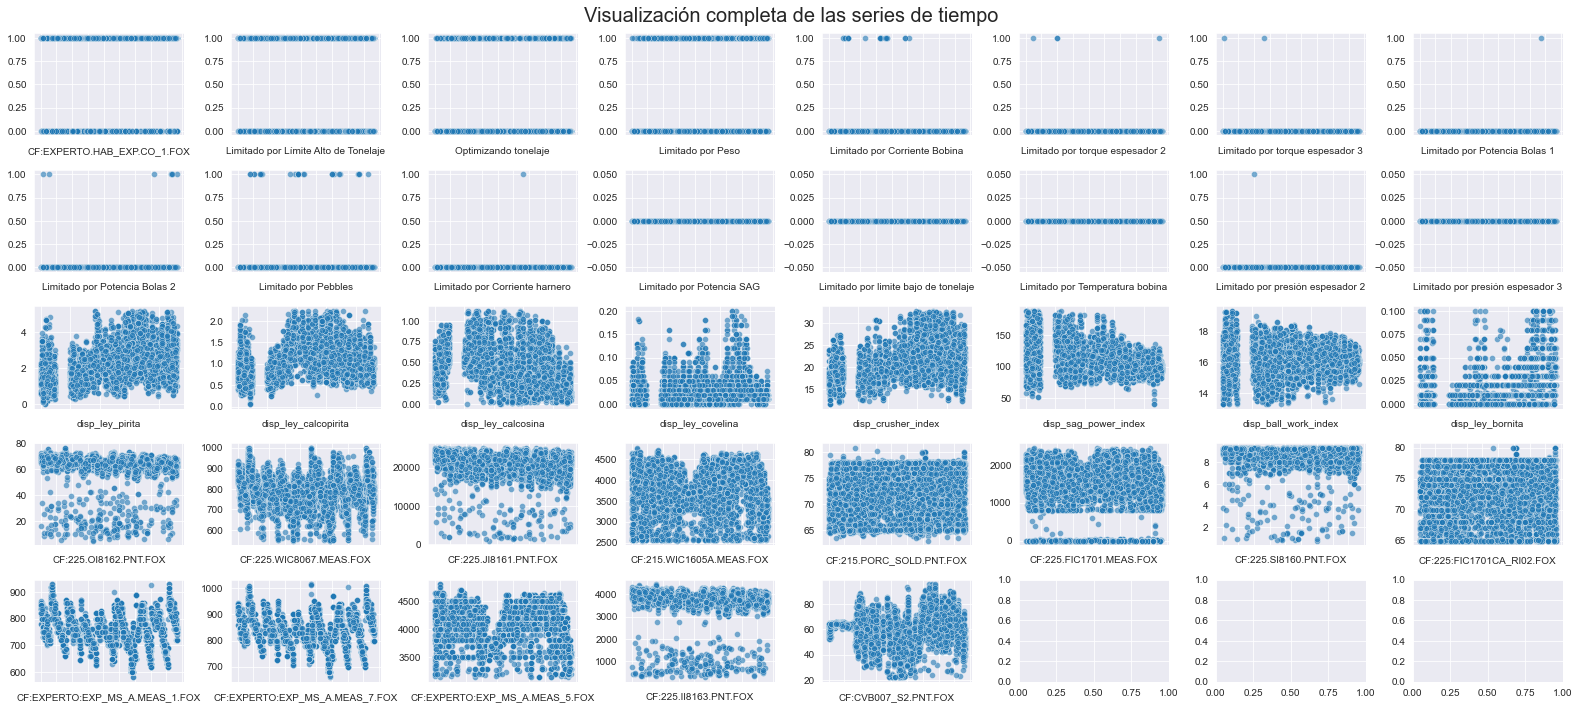

In [15]:
# Visualización completa de las series temporales

sample=consolidation.copy().sample(10000)
fig, ax = plt.subplots(5, 8, figsize=(22,10))
k = 0
for i in range(5):
    for j in range(8):
        try:
            sns.scatterplot(data=sample, x=sample.index, y=sample.columns[k], alpha=0.6, ax=ax[i, j])
            ax[i, j].set_ylabel('', fontsize = 10.0)
            ax[i, j].set_xlabel(sample.columns[k], fontsize = 10.0)
            ax[i, j].set_xticklabels('')
            k+=1
        except:
            pass
fig.suptitle('Visualización completa de las series de tiempo',size=20)
fig.tight_layout()

<AxesSubplot:>

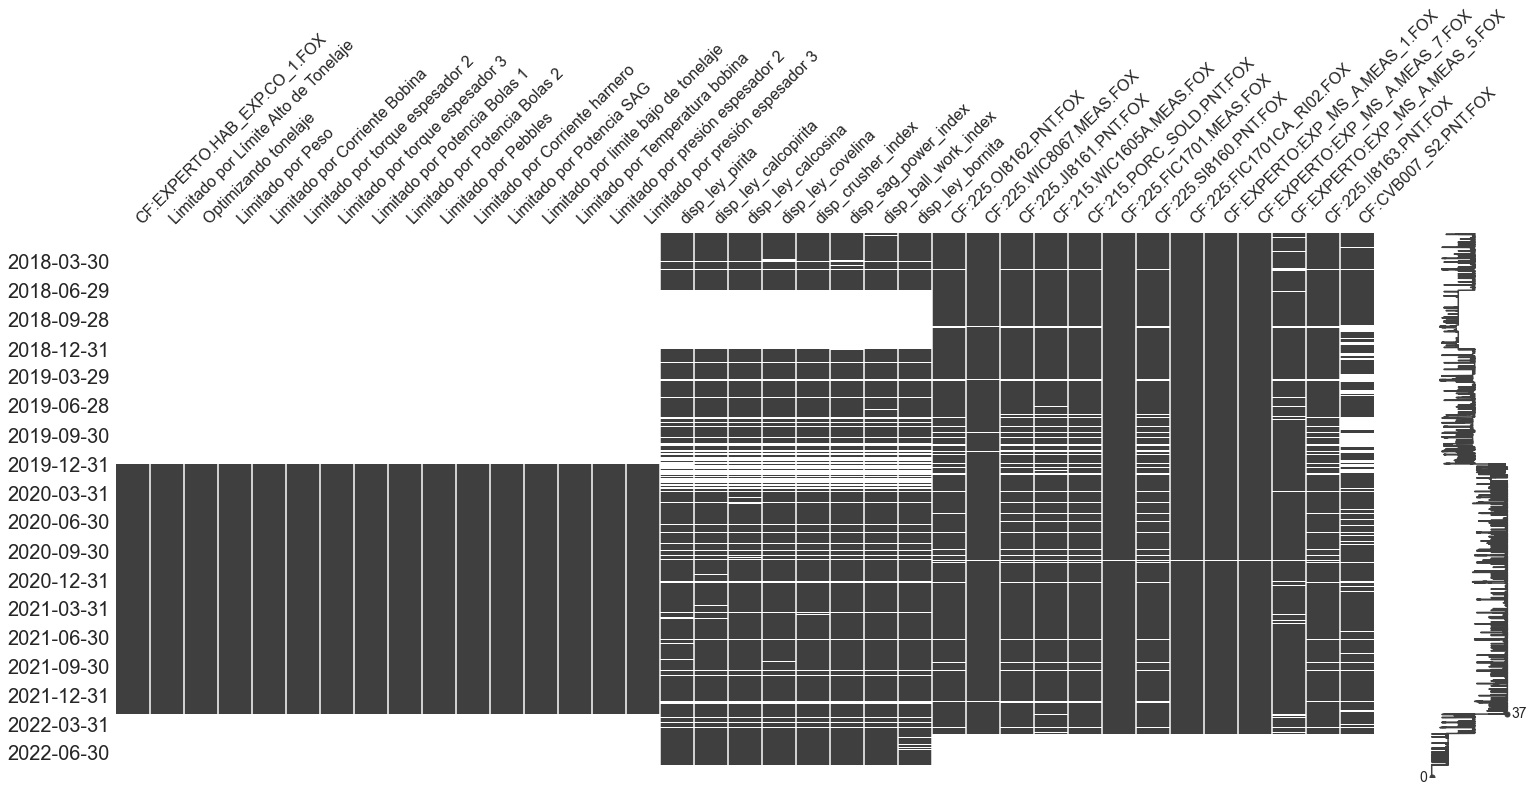

In [16]:
# Missings
msno.matrix(consolidation,freq='BQ')

In [17]:
# Se guarda en csv
consolidation.to_csv('../../data/consolidated data/cleaned_'+pd.to_datetime('today').strftime('%d%B%Y')+'.csv', index=True)